In [3]:
from pymongo import MongoClient
from bson import ObjectId
import pandas as pd
from datetime import datetime as datetime
import matplotlib.pyplot as plt

client = MongoClient("mongodb://localhost:27017")

db = client["lifesnaps"] 
collection = db["fitbit"]

userID = ObjectId("621e2f9167b776a240011ccb")




In [28]:
qry = {
    "id": ObjectId("621e2f9167b776a240011ccb"),
    "type": "resting_heart_rate",
    }
  
projection = {
    "id":1, 
    "data.dateTime": 1, 
    "data.value.value": 1, 
    "data.value.error":1, 
    "_id":0
    }

rawDocs = list(collection.find(qry,projection))

In [ ]:
# Convert to DataFrame
flatDocs = []
for doc in rawDocs:
    data = doc.get("data",{})
    value = data.get("value",{})
    
 # confidence van 0 niet inbegrepen -> te onzeker
    flatDocs.append({
        "dateTime": data["dateTime"],
        "restingHeartRate": value["value"],
        "errorRHR": value["error"],
    })


df_RHR = pd.DataFrame(flatDocs)
df_RHR["dateTime"] = pd.to_datetime(df_RHR["dateTime"], errors='coerce')
df_RHR["restingHeartRate"] = pd.to_numeric(df_RHR["restingHeartRate"], errors='coerce')
df_RHR["errorRHR"] = pd.to_numeric(df_RHR["errorRHR"], errors='coerce')
df_RHR = df_RHR.sort_values(by='dateTime', ascending=True)
df_RHR.head(70)



C:\Users\Arnout Plettinx\AppData\Local\Temp\ipykernel_23280\772757408.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_RHR["dateTime"] = pd.to_datetime(df_RHR["dateTime"], errors='coerce')


<bound method NDFrame.describe of      dateTime  restingHeartRate    errorRHR
70 2021-10-22          0.000000    0.000000
78 2021-10-23         65.000000  100.000000
0  2021-10-24         64.965289   13.884297
38 2021-10-25         66.052319    8.661454
46 2021-10-26         67.032057    7.369269
..        ...               ...         ...
69 2022-01-18         61.554977    6.787558
29 2022-01-19         62.441945    6.787243
61 2022-01-20          0.000000    0.000000
53 2022-01-21          0.000000    0.000000
30 2022-01-22          0.000000    0.000000

[93 rows x 3 columns]>

In [34]:
(df_RHR == 0).describe()

,dateTime,restingHeartRate,errorRHR
count,93,93,93
unique,1,2,2
top,False,False,False
freq,93,89,89


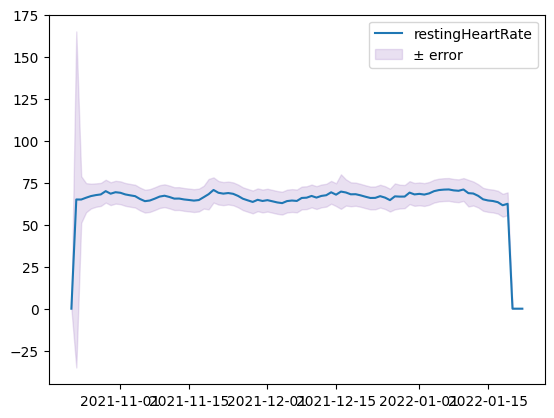

In [47]:
(df_RHR == 0).sum() # 4x 0-waarden

upper = df_RHR["restingHeartRate"] + df_RHR["errorRHR"]
lower = df_RHR["restingHeartRate"] - df_RHR["errorRHR"]

plt.plot(df_RHR["dateTime"], df_RHR["restingHeartRate"], label="restingHeartRate")
plt.fill_between(df_RHR["dateTime"], lower, upper, color='tab:purple', alpha=0.2, label="± error")
plt.legend()